<a href="https://colab.research.google.com/github/wiradear/Practical-Machine-Leaning-and-Data-Mining/blob/main/6409650311_ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - การทำ Dimensionality reductions และจัดกลุ่มด้วย Kmeans

# Import

In [ ]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

X_train = pd.read_table('/content/drive/MyDrive/CS345/data/data_train.txt', header = None, delim_whitespace = True)
y_train = np.loadtxt('/content/drive/MyDrive/CS345/data/data_train_labels.txt', dtype=int)
X_test = pd.read_table('/content/drive/MyDrive/CS345/data/data_test.txt', header = None, delim_whitespace = True)
y_test = np.loadtxt('/content/drive/MyDrive/CS345/data/data_test_labels.txt', dtype=int)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7352, 561) (7352,) (2947, 561) (2947,)


# 1. ให้รวมข้อมูลจาก training กับ test เข้าด้วยกัน
โดยรวม X_train กับ X_test
เป็น X และรวม y_train กับ y_test เป็น y แล้วแสดงค่าของคลาสที่มีทั้งหมดใน y โดยค่าที่ควรจะได้คือ 1, 2, 3, 4, 5, 6
ความหมายของ labels เหล่านี้คือ :
- 1 - walking
- 2 - walking upstairs
- 3 - walking downstairs
- 4 - sitting
- 5 - standing
- 6 - laying down

In [ ]:
# Combine the data
X = pd.concat([X_train, X_test])
y = np.concatenate([y_train, y_test])

# print y (label of class)
print("All labels: {}".format(np.unique(y)))

All labels: [1 2 3 4 5 6]


# 2. ให้ปรับ Scale ของข้อมูลใน X ด้วย StandardScaler

In [ ]:
# from sklearn.preprocessing import StandardScaler

scaler = StandardScaler();
scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled

array([[ 2.10533854e-01, -6.87026385e-02, -4.52194533e-01, ...,
        -6.74432366e-01,  3.82007658e-01, -1.61505480e-02],
       [ 6.02084832e-02,  3.59023537e-02, -2.75221885e-01, ...,
        -6.81359801e-01,  3.83147865e-01, -1.20627169e-04],
       [ 7.84597052e-02, -4.64269585e-02, -8.55480582e-02, ...,
        -6.89470939e-01,  3.84288531e-01,  1.92144041e-02],
       ...,
       [ 1.11821625e+00,  1.28805864e+00, -1.29414692e-01, ...,
        -3.10750224e-01,  6.91509049e-01,  8.75719123e-01],
       [-5.43492722e-01,  9.75327452e-01,  2.34319837e-01, ...,
        -3.19283719e-01,  6.59762215e-01,  8.99444350e-01],
       [-1.78515253e+00, -1.86663622e-02, -5.29759691e-01, ...,
        -3.19991245e-01,  6.56994458e-01,  9.01454465e-01]])

# 3. ให้ใช้อัลกอริทึม PCA ในการลดขนาดของ dimensions
 โดยให้เหลือจํานวน components เท่าที่จําเป็น เพื่อให้ได้ค่า variance ที่จำเป็นในการอธิบายข้อมูลที่ปรับ scale แล้วอย่างน้อย 90% ด้วยการใช้พารามิเตอร์ n_components และให้ใส่ ค่า random_state = 17

In [ ]:
# from sklearn.decomposition import PCA

pca = PCA(n_components=100, random_state=17)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# print("PCA components: \n", pca.components_)
print("PCA components: \n", pca.components_.T)

PCA components: 
 [[ 0.00032202  0.01667862 -0.03345162 ...  0.02761147  0.00743829
   0.02136516]
 [-0.00265502  0.00050924  0.00185358 ...  0.03745243 -0.02198339
  -0.0369768 ]
 [-0.00183102 -0.00496277  0.0090158  ...  0.0629898  -0.01471364
   0.02221892]
 ...
 [-0.02322551  0.0248285   0.0927247  ...  0.00400131  0.00444292
   0.01269342]
 [ 0.028696   -0.04036438 -0.06636139 ... -0.01194292  0.0343617
  -0.00408966]
 [ 0.02622314 -0.02188039 -0.04427153 ...  0.00871159  0.02393848
   0.01957008]]


In [ ]:
print("Transformed data :\n", X_pca)

Transformed data :
 [[-16.38097982   1.99508307   3.41569024 ...   0.44001753  -3.67069339
    0.38865125]
 [-15.58217328   1.18259368  -0.32120674 ...   0.23116721   0.39865393
   -0.42175572]
 [-15.42398918   2.24316643  -1.23778355 ...  -0.1965368    0.35263602
   -0.6515843 ]
 ...
 [ 11.84685312  -3.43356502   2.18801923 ...  -0.55780511  -0.34980765
   -0.53599171]
 [  8.20668637  -4.38648876   1.31871956 ...  -0.60319588  -0.77115051
   -0.28546097]
 [  9.31117251  -3.98616133   1.93301746 ...  -1.24921254  -0.49581977
   -0.03162281]]


In [ ]:
exp_var = pca.explained_variance_ratio_

print("Total variation explained:\n {0} = {1:.2f}%".format(exp_var, sum(pca.explained_variance_ratio_*100)))
print()
print("Original shape: " ,X_scaled.shape)
print("Transformed shape: " ,X_pca.shape)

Total variation explained:
 [0.50738221 0.06239186 0.02692564 0.02452871 0.01888936 0.01631395
 0.01414533 0.01216211 0.00985248 0.00949228 0.00858304 0.0080998
 0.00765863 0.00676668 0.00630242 0.00615718 0.00595335 0.00577195
 0.00563431 0.0054083  0.00518828 0.00502742 0.00473229 0.00463818
 0.00446848 0.00439868 0.00416863 0.00400808 0.00389072 0.00381338
 0.00366869 0.00364357 0.00349224 0.00346736 0.00335538 0.0032941
 0.00323824 0.00300503 0.00294253 0.00290447 0.00275759 0.0026986
 0.00264193 0.00258026 0.00255021 0.00247772 0.00245532 0.00238285
 0.0023589  0.00232029 0.00228344 0.00219146 0.00212623 0.00209119
 0.00203434 0.00201121 0.00198057 0.00194361 0.00192478 0.00189465
 0.00186297 0.00182842 0.00180738 0.00176312 0.00174088 0.00171313
 0.00171008 0.00167305 0.00163353 0.00161317 0.00160186 0.00156323
 0.0015003  0.00148493 0.00148197 0.00144754 0.0014378  0.0014184
 0.00140261 0.00136766 0.00132994 0.00132426 0.00130384 0.00127767
 0.00126778 0.00123725 0.00119214 0.00

# 4. ให้พิมพ์ค่าจํานวน components ที่ต้องใช้เพื่อให้ได้ค่า variance ที่สามารถอธิบายข้อมูลที่ปรับ scale แล้วได้ 90%
(Hint ดูได้จากจํานวน column ที่เหลือของ X หลังจากทํา PCA แล้ว)

In [ ]:
total_rows, total_cols = X_pca.shape
print("Number of components(col) after scaled: ", total_cols)

Number of components(col) after scaled:  100


# 5. ให้แสดง % ของค่า variance ที่ first principal component สามารถอธิบายได้
(Hint: ตัวแปร explained_variance_ratio_ของ PCA โดยเอาข้อมูลช่องแรกหรือช่องที่ 0)

In [ ]:
print("Variance of first principal component: {:.2f}%".format(pca.explained_variance_ratio_[0]*100))

Variance of first principal component: 50.74%


# 6. Visualize ข้อมูลที่ถูก transform ใหม่ด้วยสอง components แรก

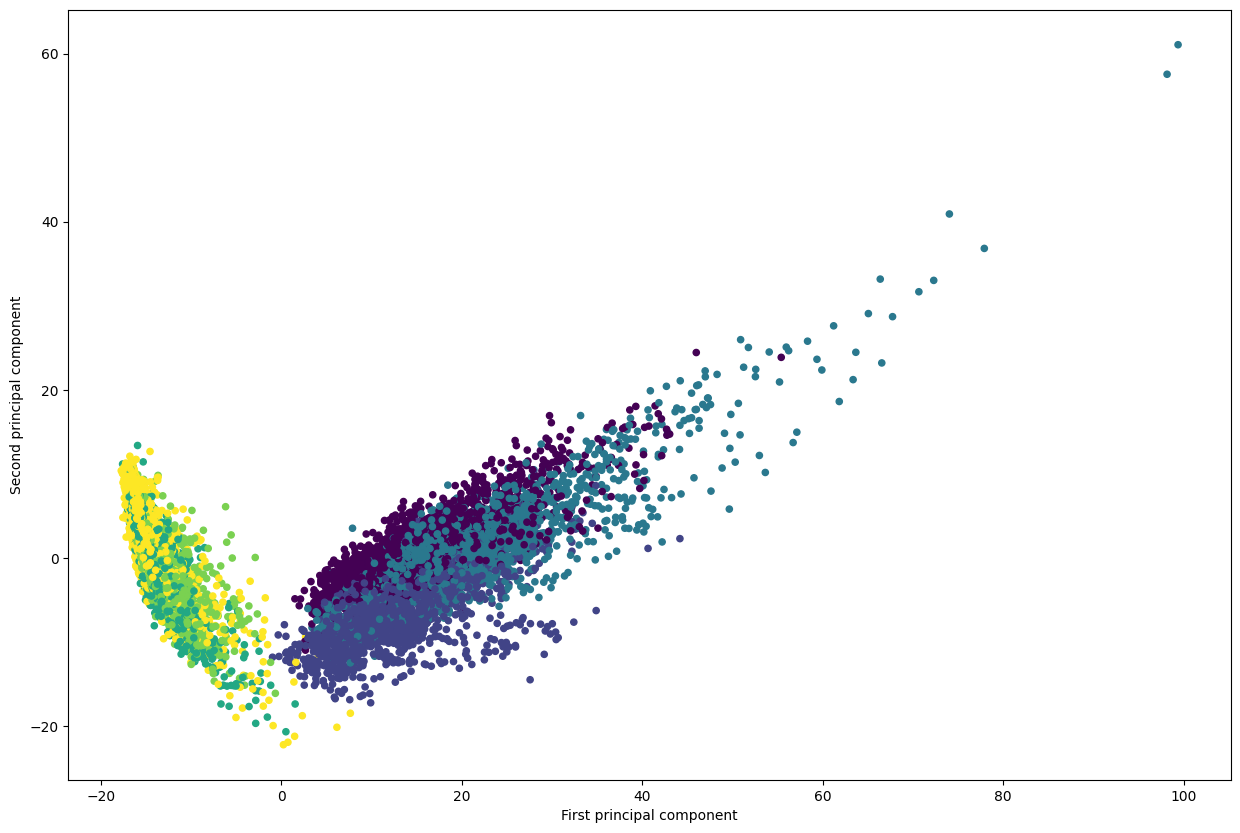

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=20, cmap='viridis');
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

# 7. ใช้ Kmeans ในการทํา clustering โดยใช้ข้อมูลที่ลดขนาด dimensions ด้วย PCA แล้ว

In [ ]:
n_classes = np.unique(y).size
kmeans = KMeans(n_clusters = n_classes, n_init = 100, random_state = 17)
cluster_labels = kmeans.fit_predict(X_pca)

# 8. Visualize ข้อมูลสอง components แรกแสดงสีของข้อมูลตามคลัสเตอร์ที่ถูกแบ่งคลัสเตอร์ละหนึ่งสี

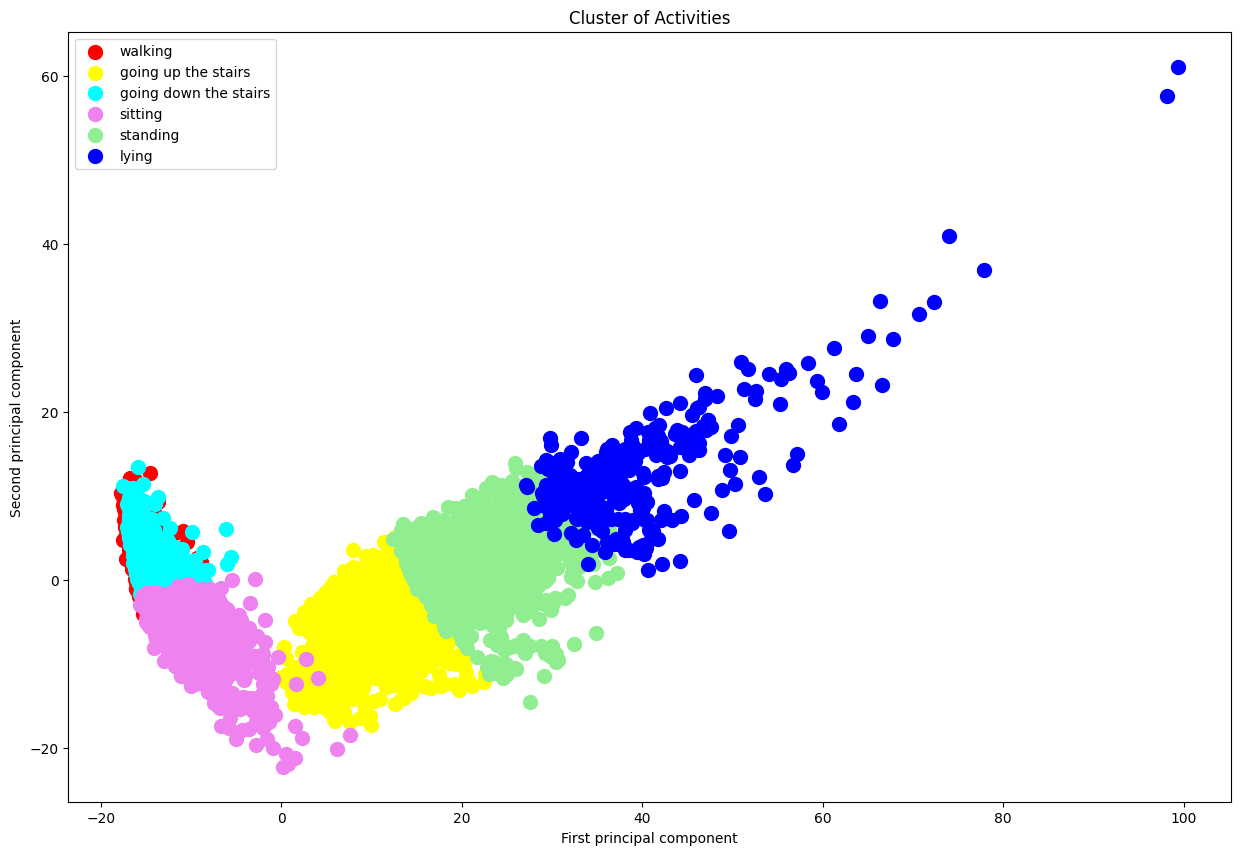

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(X_pca[cluster_labels == 0, 0], X_pca[cluster_labels == 0, 1], s = 100, c = 'red', label = 'walking')
plt.scatter(X_pca[cluster_labels == 1, 0], X_pca[cluster_labels == 1, 1], s = 100, c = 'yellow', label = 'going up the stairs')
plt.scatter(X_pca[cluster_labels == 2, 0], X_pca[cluster_labels == 2, 1], s = 100, c = 'aqua', label = 'going down the stairs')
plt.scatter(X_pca[cluster_labels == 3, 0], X_pca[cluster_labels == 3, 1], s = 100, c = 'violet', label = 'sitting')
plt.scatter(X_pca[cluster_labels == 4, 0], X_pca[cluster_labels == 4, 1], s = 100, c = 'lightgreen', label = 'standing')
plt.scatter(X_pca[cluster_labels == 5, 0], X_pca[cluster_labels == 5, 1], s = 100, c = 'blue', label = 'lying')
plt.title("Cluster of Activities")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()

plt.show()

In [ ]:
#เทียบผลการจัดกลุ่ม
tab = pd.crosstab(y, cluster_labels, margins = True)
tab.index = ['walking', 'going up the stairs', 'going down the stair', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,0,901,0,0,744,77,1722
going up the stairs,0,1239,0,2,298,5,1544
going down the stair,0,319,0,0,891,196,1406
sitting,91,1,1235,450,0,0,1777
standing,0,0,1341,565,0,0,1906
lying,1556,5,53,330,0,0,1944
all,1647,2465,2629,1347,1933,278,10299


In [ ]:
pd.Series(tab.iloc[:-1, :-1].max(axis=1).values / tab.iloc[:-1, -1].values, index = tab.index[:-1])

walking                 0.523229
going up the stairs     0.802461
going down the stair    0.633713
sitting                 0.694992
standing                0.703568
lying                   0.800412
dtype: float64

# 9. จากผลที่ได้แสดงว่า Kmeans ไม่ได้แยก  activities เป็น 6 กลุ่มได้ดีนัก ให้ลองใช้ elbow method ในการหาจำนวนคลัสเตอร์ที่เหมาะสม แสดงกราฟของ    elbow method

In [ ]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, n_init = 100, random_state = 17)
  kmeans.fit(X_pca)
  wcss.append(kmeans.inertia_)

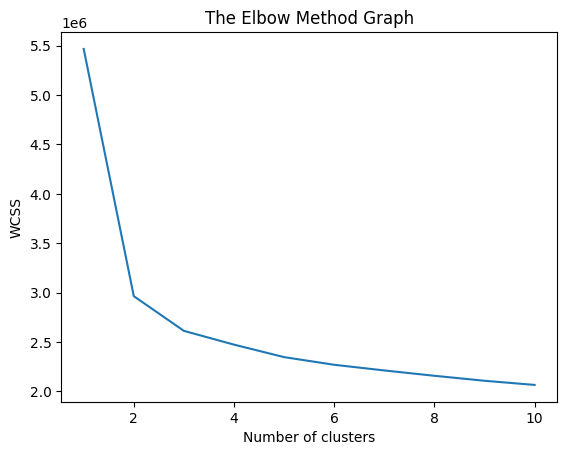

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# 10.

# 10.1 รัน Kmeans ใหม่ด้วยจํานวนคลัสเตอร์ที่ได้จาก Elbow method โดยใช้พารามิเตอร์ชุดเดิมแต่เปลี่ยนแค่ค่า n_clusters เป็นจํานวนคลัสเตอร์ที่ได้จากข้อ 9

In [ ]:
kmeans_new = KMeans(n_clusters = 2, n_init = 100, random_state = 17)
cluster_labels_new = kmeans_new.fit_predict(X_pca)

# 10.2. Plot กราฟการกระจายตัวของข้อมูลที่ได้พร้อม cluster center10.2 Plot กราฟการกระจายตัวของข้อมูลที่ได้พร้อม cluster center

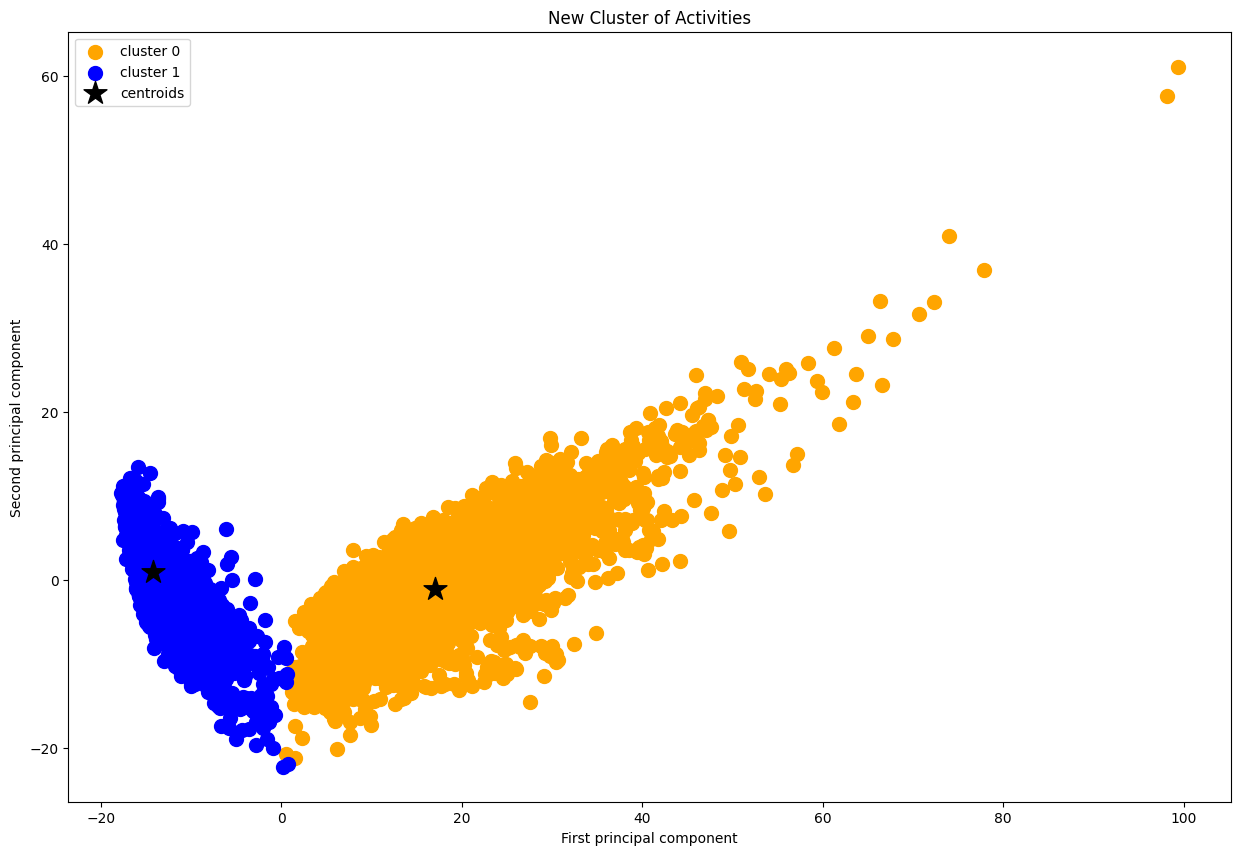

In [ ]:
plt.figure(figsize=(15, 10))
plt.scatter(X_pca[cluster_labels_new == 0, 0], X_pca[cluster_labels_new == 0, 1], s = 100, c = 'orange', label = 'cluster 0')
plt.scatter(X_pca[cluster_labels_new == 1, 0], X_pca[cluster_labels_new == 1, 1], s = 100, c = 'blue', label = 'cluster 1')
plt.scatter(kmeans_new.cluster_centers_[:,0] , kmeans_new.cluster_centers_[:,1] , s = 300, color = 'black', marker = '*', label = 'centroids')
plt.title("New Cluster of Activities")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

# 10.3. ให้สรุปลักษณะเด่นของคลัสเตอร์ที่ได้

จำนวนcluster ที่ได้  คือ k=2 จาก elbow method โดย cluster center หรือ centroid ของแต่ละกลุ่มแทนด้วยสัญลักษณ์ดาว (*) ซึ่งลักษณะของแต่ละ cluster คือ
-  cluster  0 จะมี point ที่มีลักษณะไกลจากจุด cluster center และไกลจากจุดอื่นๆด้วย
- cluster1 มีลักษณะเป็นกระจุกตัว

และทั้ง 2 cluster มีลักษณะการแยกกันของ data point กลุ่มที่ค่อนข้างชัดเจน